$$\underline{\textbf{Making a Model a Simulating a Simple Pendulum}}$$

This notebook will serve as a proof-of-concept for our project, showing that we can extend this concept to a physical pendulum and later a chaotic double pendulum.  
This notebook will follow the following general lay out:  
$\textbf{Step 1}$: Developing a Mathematical Model  
$\textbf{Step 2}$: Generating Plots of Data  
$\textbf{Step 3}$: Generating a Simulation  

$$\underline{\textbf{Step 1: Developing a Mathematical Model}}$$
I would like to first get the equations of motion in polar coordinates using the Euler-Lagrange equations.  
Let me draw a picture for clarity  

<p align="center"><img src="./images/pendulum.jpg" alt="drawing" width="400"/></p>

Now we can easily define the kinetic and potential a follows  
$$T=\frac{1}{2}mL^2\dot{\theta}$$
$$V=mgL(1-\cos(\theta))$$
Which leads to the Lagrangian  
$$L=T-V=\frac{1}{2}mL^2\dot{\theta}-mgL(1-\cos(\theta))$$
The Euler-Lagrange equation gives  
$$\frac{\partial}{\partial t}\left(\frac{\partial L}{\partial \dot{\theta}}\right)-\frac{\partial L}{\delta \theta}=0$$
And we know 
$$\frac{\partial L}{\partial \dot{\theta}}=mL^2\dot{\theta}\implies\frac{\partial}{\partial t}\left(\frac{\partial L}{\partial \dot{\theta}}\right)=mL^2\ddot{\theta}$$
$$\frac{\partial L}{\delta \theta}=-mgL\sin(\theta)$$
Plugging into the Euler-Lagrange equation gives 
$$mL^2\ddot{\theta}+mgL\sin(\theta)=0$$
Cancelling the common terms (L and m) and dividing the entire equation by L gives the recognizable equation 
$$\ddot{\theta}+\frac{g}{L}\sin(\theta)=0$$

$$\underline{\textbf{Step 2: Generating Plots of Data}}$$
I will be using numpy, scipy, and matplotlib for the following code.  
We will set $L=1\;m$ for simplicity and use $g=9.8\;\frac{m}{s}$  
I will make one function that takes in a time t and an array containing theta and omega, this function will return an array containing dtheta_dt and domega_dt  
I can now use scipy's solve_ivp function to solve my ODE and get theta at a t and t.  
Then I simply plot these outputs with matplotlib  


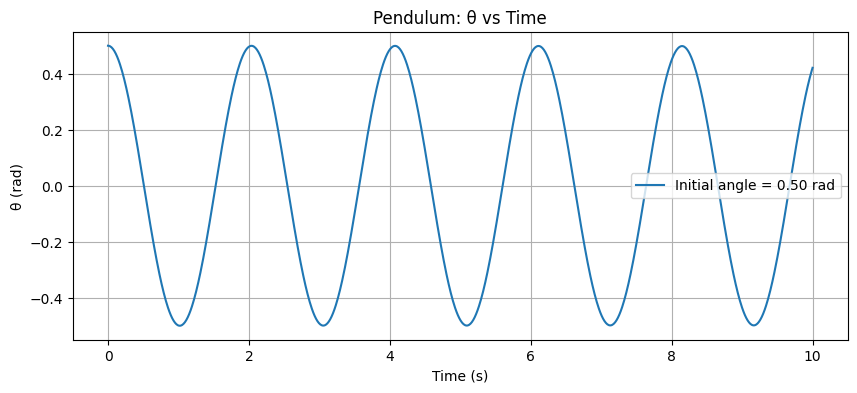

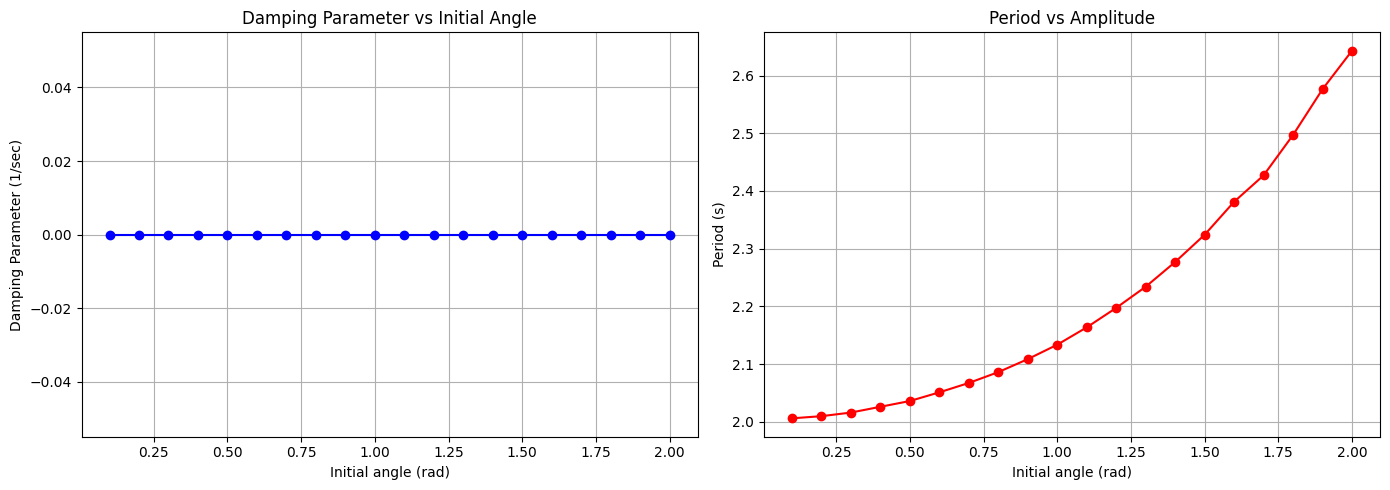

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks

# Parameters
g = 9.81     # gravitational acceleration (m/s^2)
L = 1.0      # length of pendulum (m)

# Define the pendulum ODE system: y = [theta, omega]
def pendulum_ode(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - (g / L) * np.sin(theta)
    return [dtheta_dt, domega_dt]

#######################################
# 1. Plot theta vs time for one initial condition
#######################################
t_span = (0, 10)               # time span for simulation
t_eval = np.linspace(t_span[0], t_span[1], 1000)
initial_angle = 0.5            # initial angle (radians)
y0 = [initial_angle, 0.0]        # initial state: [theta, omega]

# Solve the ODE
sol = solve_ivp(pendulum_ode, t_span, y0, t_eval=t_eval, method='RK45')
theta_t = sol.y[0]
time = sol.t

# Plot theta vs time
plt.figure(figsize=(10, 4))
plt.plot(time, theta_t, label=f'Initial angle = {initial_angle:.2f} rad')
plt.xlabel('Time (s)')
plt.ylabel('θ (rad)')
plt.title('Pendulum: θ vs Time')
plt.legend()
plt.grid(True)
plt.show()

#######################################
# 2. Compute period (and frequency) vs initial angle amplitude
#######################################
# We will vary the initial angle from 0.1 to 2.0 radians
initial_angles = np.linspace(0.1, 2.0, 20)
periods = []

# Use a sufficiently long simulation time to capture at least two peaks
t_sim = 20
t_eval = np.linspace(0, t_sim, 2000)

for theta0 in initial_angles:
    y0 = [theta0, 0.0]
    sol = solve_ivp(pendulum_ode, (0, t_sim), y0, t_eval=t_eval, method='RK45')
    theta = sol.y[0]
    t = sol.t
    # Use find_peaks to locate local maxima of theta (one period is the time between successive peaks)
    peaks, _ = find_peaks(theta)
    if len(peaks) >= 2:
        # Average period from successive peak differences
        T = np.mean(np.diff(t[peaks]))
    else:
        T = np.nan
    periods.append(T)

periods = np.array(periods)
beta = 0 / periods  # Frequency in Hz

#######################################
# 3. Plot frequency vs initial angle and period vs amplitude
#######################################
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot frequency vs initial angle
ax[0].plot(initial_angles, beta, 'o-', color='blue')
ax[0].set_xlabel('Initial angle (rad)')
ax[0].set_ylabel('Damping Parameter (1/sec)')
ax[0].set_title('Damping Parameter vs Initial Angle')
ax[0].grid(True)

# Plot period vs initial angle (amplitude)
ax[1].plot(initial_angles, periods, 'o-', color='red')
ax[1].set_xlabel('Initial angle (rad)')
ax[1].set_ylabel('Period (s)')
ax[1].set_title('Period vs Amplitude')
ax[1].grid(True)

plt.tight_layout()
plt.show()